In [40]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from imutils import paths
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [2]:
data = []
labels = []
path, dirs, files = next(os.walk("datasets")) # FILES IN OUR DATASET


In [22]:
for fl in files:
    img = cv2.imread("datasets/" + fl) # READ IMAGES
    img = cv2.resize(img, (128, 128))# RESIZE AND FLATTERN IMAGE
    data.append(img)

    if fl.startswith("c"):
        labels.append("cat")
    elif fl.startswith("d"):
        labels.append("dog")
    elif fl.startswith("p"):
        labels.append("panda")


In [29]:
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [30]:
print("[INFO] Data and labels shapes:", data.shape, labels.shape, sep='\n')

[INFO] Data and labels shapes:
(3000, 128, 128, 3)
(3000,)


In [31]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size = 0.25, random_state = 42)

In [32]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [35]:
from SmallVGGNet import SmallVGGNet as svg

In [36]:
model = svg.build(128, 128, 3, 3)

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 64)        0

In [43]:
keras.utils.plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [44]:
lr = 1e-3
epochs = 30

In [46]:
sgd = keras.optimizers.SGD(learning_rate=lr, momentum=0.9)
los = keras.losses.CategoricalCrossentropy()

In [47]:
model.compile(optimizer=sgd, loss = los, metrics='accuracy')

In [48]:
print("[INFO] Training...")
history = model.fit(trainX, trainY, batch_size=128, validation_split=0.2, epochs= epochs)
print("[INFO] Training complete.")

[INFO] Training...
Epoch 1/30
57/57 [==============================] - 7s 118ms/step - loss: 1.2996 - accuracy: 0.5567 - val_loss: 1.5745 - val_accuracy: 0.3044
Epoch 2/30
57/57 [==============================] - 6s 102ms/step - loss: 0.9184 - accuracy: 0.6567 - val_loss: 2.5806 - val_accuracy: 0.3178
Epoch 3/30
57/57 [==============================] - 6s 102ms/step - loss: 0.6595 - accuracy: 0.7117 - val_loss: 2.8939 - val_accuracy: 0.3156
Epoch 4/30
57/57 [==============================] - 6s 102ms/step - loss: 0.6091 - accuracy: 0.7367 - val_loss: 2.5402 - val_accuracy: 0.3222
Epoch 5/30
57/57 [==============================] - 6s 102ms/step - loss: 0.5215 - accuracy: 0.7639 - val_loss: 2.0676 - val_accuracy: 0.3400
Epoch 6/30
57/57 [==============================] - 6s 102ms/step - loss: 0.4453 - accuracy: 0.8028 - val_loss: 1.8199 - val_accuracy: 0.3622
Epoch 7/30
57/57 [==============================] - 6s 102ms/step - loss: 0.3981 - accuracy: 0.8244 - val_loss: 2.0169 - val_accu

In [50]:
print("[INFO] Evaluating network...")
predictions = model.predict(x = testX, batch_size = 32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] Evaluating network...
              precision    recall  f1-score   support

         cat       0.58      0.69      0.63       262
         dog       0.56      0.51      0.53       249
       panda       0.90      0.79      0.84       239

    accuracy                           0.66       750
   macro avg       0.68      0.66      0.67       750
weighted avg       0.67      0.66      0.66       750



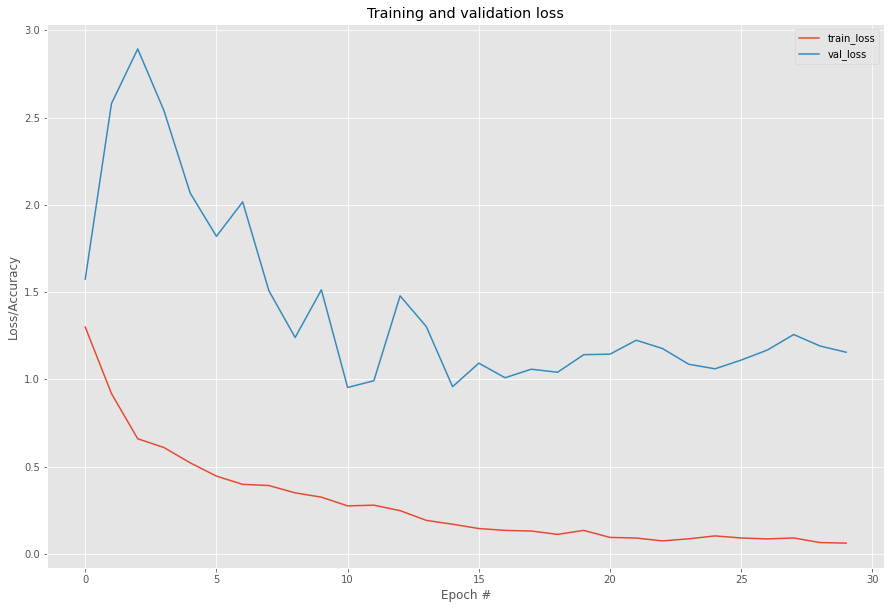

In [56]:
# plot the training loss and accuracy
N = np.arange(0, epochs)
plt.style.use("ggplot")
plt.figure(figsize=(15,10))
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.title("Training and validation loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()



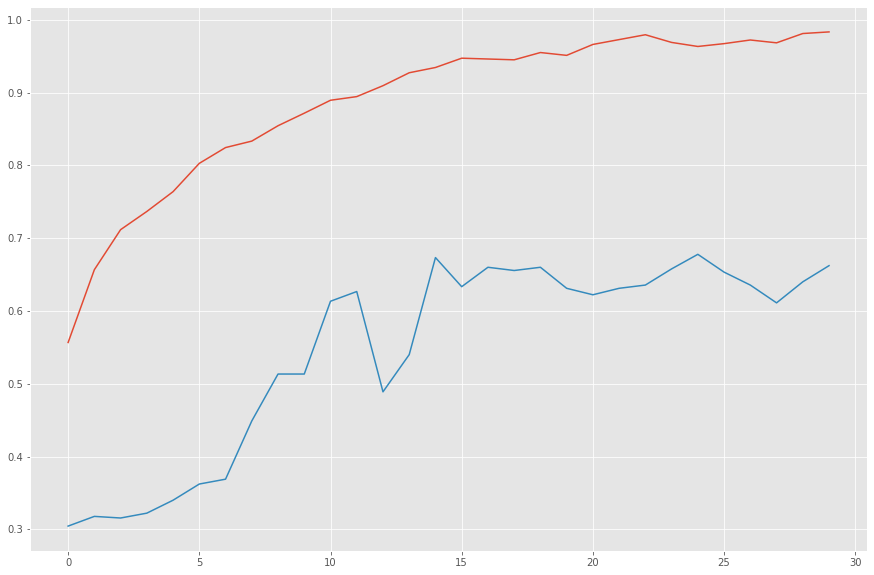

In [57]:
plt.figure(figsize=(15,10))
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.legend
plt.show()

In [58]:
from LeNet import LeNet

In [60]:
leModel = LeNet.build(3, 128, 128, activation='relu',n_class=3, w_path=None)

In [68]:
lr = 1e-2
epochs = 10

In [62]:
sgd = keras.optimizers.SGD(learning_rate=lr, momentum=0.9)
los = keras.losses.CategoricalCrossentropy()

In [65]:
leModel.compile(optimizer=sgd, loss = los, metrics='accuracy')

In [67]:
history = leModel.fit(x = trainX, y = trainY, validation_split=0.2, batch_size = 32, epochs = epochs)

Epoch 1/30
57/57 [==============================] - 3s 49ms/step - loss: 0.8595 - accuracy: 0.5761 - val_loss: 0.8216 - val_accuracy: 0.5422
Epoch 2/30
57/57 [==============================] - 3s 47ms/step - loss: 0.7880 - accuracy: 0.6033 - val_loss: 0.8045 - val_accuracy: 0.6000
Epoch 3/30
57/57 [==============================] - 3s 47ms/step - loss: 0.7458 - accuracy: 0.6394 - val_loss: 0.7733 - val_accuracy: 0.5822
Epoch 4/30
57/57 [==============================] - 3s 47ms/step - loss: 0.7010 - accuracy: 0.6478 - val_loss: 0.7762 - val_accuracy: 0.5933
Epoch 5/30
57/57 [==============================] - 3s 47ms/step - loss: 0.6789 - accuracy: 0.6778 - val_loss: 0.8187 - val_accuracy: 0.5889
Epoch 6/30
57/57 [==============================] - 3s 47ms/step - loss: 0.6580 - accuracy: 0.6739 - val_loss: 0.7262 - val_accuracy: 0.6267
Epoch 7/30
57/57 [==============================] - 3s 47ms/step - loss: 0.6157 - accuracy: 0.7072 - val_loss: 0.7464 - val_accuracy: 0.6356
Epoch 8/30
57

---
---
---

In [71]:
from MyNet import MyNet

In [72]:
myModel = MyNet.build(3, 128, 128, 3, activation='relu')

In [82]:
lr = 1e-4
epochs = 10

In [83]:
sgd = keras.optimizers.SGD(learning_rate=lr, momentum=0.9)
los = keras.losses.CategoricalCrossentropy()

In [84]:
myModel.compile(optimizer=sgd, loss=los, metrics='accuracy')

In [85]:
history = myModel.fit(x=trainX, y=trainY, validation_split=0.2, batch_size = 32, epochs = epochs)

Epoch 1/10
57/57 [==============================] - 8s 133ms/step - loss: 1.9563 - accuracy: 0.7294 - val_loss: 4.2021 - val_accuracy: 0.3978
Epoch 2/10
57/57 [==============================] - 7s 129ms/step - loss: 1.3404 - accuracy: 0.7667 - val_loss: 3.3164 - val_accuracy: 0.4467
Epoch 3/10
57/57 [==============================] - 7s 130ms/step - loss: 1.1649 - accuracy: 0.7678 - val_loss: 2.0550 - val_accuracy: 0.5600
Epoch 4/10
57/57 [==============================] - 7s 129ms/step - loss: 1.0218 - accuracy: 0.7800 - val_loss: 2.3801 - val_accuracy: 0.5822
Epoch 5/10
57/57 [==============================] - 7s 130ms/step - loss: 1.0155 - accuracy: 0.7806 - val_loss: 1.7459 - val_accuracy: 0.6289
Epoch 6/10
57/57 [==============================] - 7s 130ms/step - loss: 0.9817 - accuracy: 0.7800 - val_loss: 1.6976 - val_accuracy: 0.6311
Epoch 7/10
57/57 [==============================] - 7s 130ms/step - loss: 0.9327 - accuracy: 0.7833 - val_loss: 1.6620 - val_accuracy: 0.6333
Epoch 